In [130]:
import pandas as pd  
import matplotlib.pyplot as plt    
import numpy as np


from sklearn import preprocessing, utils
from sklearn.model_selection import train_test_split
import sklearn

!pip install imbalanced-learn
import imblearn

!pip install tensorflow
import tensorflow as tf

%matplotlib inline

In [17]:
travel_filename = 'travel.csv'

raw_data = pd.read_csv(travel_filename)
raw_data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [18]:
print(raw_data.dtypes)
raw_data.describe()

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [20]:
raw_data
categorical_data = raw_data.select_dtypes(exclude='number')
numerical_data = raw_data.select_dtypes(include='number')
categorical_data.head()

,Product type,SKU,Customer demographics,Shipping carriers,Supplier name,Location,Inspection results,Transportation modes,Routes
0,haircare,SKU0,Non-binary,Carrier B,Supplier 3,Mumbai,Pending,Road,Route B
1,skincare,SKU1,Female,Carrier A,Supplier 3,Mumbai,Pending,Road,Route B
2,haircare,SKU2,Unknown,Carrier B,Supplier 1,Mumbai,Pending,Air,Route C
3,skincare,SKU3,Non-binary,Carrier C,Supplier 5,Kolkata,Fail,Rail,Route A
4,skincare,SKU4,Non-binary,Carrier A,Supplier 1,Delhi,Fail,Air,Route A


In [21]:
categorical_data.columns

Index(['Product type', 'SKU', 'Customer demographics', 'Shipping carriers',
       'Supplier name', 'Location', 'Inspection results',
       'Transportation modes', 'Routes'],
      dtype='object')

In [22]:
for col in categorical_data.columns:
    print ('Column Name: {}\t Unique entries:{}'.format(col, categorical_data[col].unique()))

Column Name: Product type	 Unique entries:['haircare' 'skincare' 'cosmetics']
Column Name: SKU	 Unique entries:['SKU0' 'SKU1' 'SKU2' 'SKU3' 'SKU4' 'SKU5' 'SKU6' 'SKU7' 'SKU8' 'SKU9'
 'SKU10' 'SKU11' 'SKU12' 'SKU13' 'SKU14' 'SKU15' 'SKU16' 'SKU17' 'SKU18'
 'SKU19' 'SKU20' 'SKU21' 'SKU22' 'SKU23' 'SKU24' 'SKU25' 'SKU26' 'SKU27'
 'SKU28' 'SKU29' 'SKU30' 'SKU31' 'SKU32' 'SKU33' 'SKU34' 'SKU35' 'SKU36'
 'SKU37' 'SKU38' 'SKU39' 'SKU40' 'SKU41' 'SKU42' 'SKU43' 'SKU44' 'SKU45'
 'SKU46' 'SKU47' 'SKU48' 'SKU49' 'SKU50' 'SKU51' 'SKU52' 'SKU53' 'SKU54'
 'SKU55' 'SKU56' 'SKU57' 'SKU58' 'SKU59' 'SKU60' 'SKU61' 'SKU62' 'SKU63'
 'SKU64' 'SKU65' 'SKU66' 'SKU67' 'SKU68' 'SKU69' 'SKU70' 'SKU71' 'SKU72'
 'SKU73' 'SKU74' 'SKU75' 'SKU76' 'SKU77' 'SKU78' 'SKU79' 'SKU80' 'SKU81'
 'SKU82' 'SKU83' 'SKU84' 'SKU85' 'SKU86' 'SKU87' 'SKU88' 'SKU89' 'SKU90'
 'SKU91' 'SKU92' 'SKU93' 'SKU94' 'SKU95' 'SKU96' 'SKU97' 'SKU98' 'SKU99']
Column Name: Customer demographics	 Unique entries:['Non-binary' 'Female' 'Unknown' 'Ma

In [23]:
numerical_data.corr()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
Price,1.000000,0.019083,0.005739,0.038424,0.078261,0.044855,0.095819,0.071942,0.058543,0.152185,-0.124575,-0.301313,-0.184123,-0.147247,0.088501
Availability,0.019083,1.000000,0.087496,-0.075170,-0.025900,0.170439,0.143769,-0.051377,-0.044179,-0.156669,0.050134,0.065333,0.134652,0.040626,-0.027315
Number of products sold,0.005739,0.087496,1.000000,-0.001641,0.022189,-0.046419,0.015992,0.087315,0.044285,0.041230,0.187945,-0.048939,0.034284,-0.082726,-0.036951
Revenue generated,0.038424,-0.075170,-0.001641,1.000000,-0.158480,-0.057296,0.029422,-0.109211,-0.072892,-0.014178,-0.037441,0.014073,-0.214025,-0.125335,0.027252
Stock levels,0.078261,-0.025900,0.022189,-0.158480,1.000000,0.072571,-0.111455,-0.094883,0.072907,0.067880,0.043763,-0.050592,0.033243,-0.149478,-0.012088
Lead times,0.044855,0.170439,-0.046419,-0.057296,0.072571,1.000000,0.105459,-0.045156,-0.120746,-0.002818,-0.145324,0.003364,-0.024441,0.015681,0.243686
Order quantities,0.095819,0.143769,0.015992,0.029422,-0.111455,0.105459,1.000000,-0.002561,0.004261,-0.086189,-0.086567,0.112347,-0.026784,0.018986,0.167306
Shipping times,0.071942,-0.051377,0.087315,-0.109211,-0.094883,-0.045156,-0.002561,1.000000,0.045108,-0.022214,-0.060470,-0.016953,0.029132,-0.036673,-0.045541
Shipping costs,0.058543,-0.044179,0.044285,-0.072892,0.072907,-0.120746,0.004261,0.045108,1.000000,0.029680,-0.097979,-0.005653,0.005984,0.083139,0.051671
Lead time,0.152185,-0.156669,0.041230,-0.014178,0.067880,-0.002818,-0.086189,-0.022214,0.029680,1.000000,0.212676,0.026756,-0.121999,0.297099,0.045219


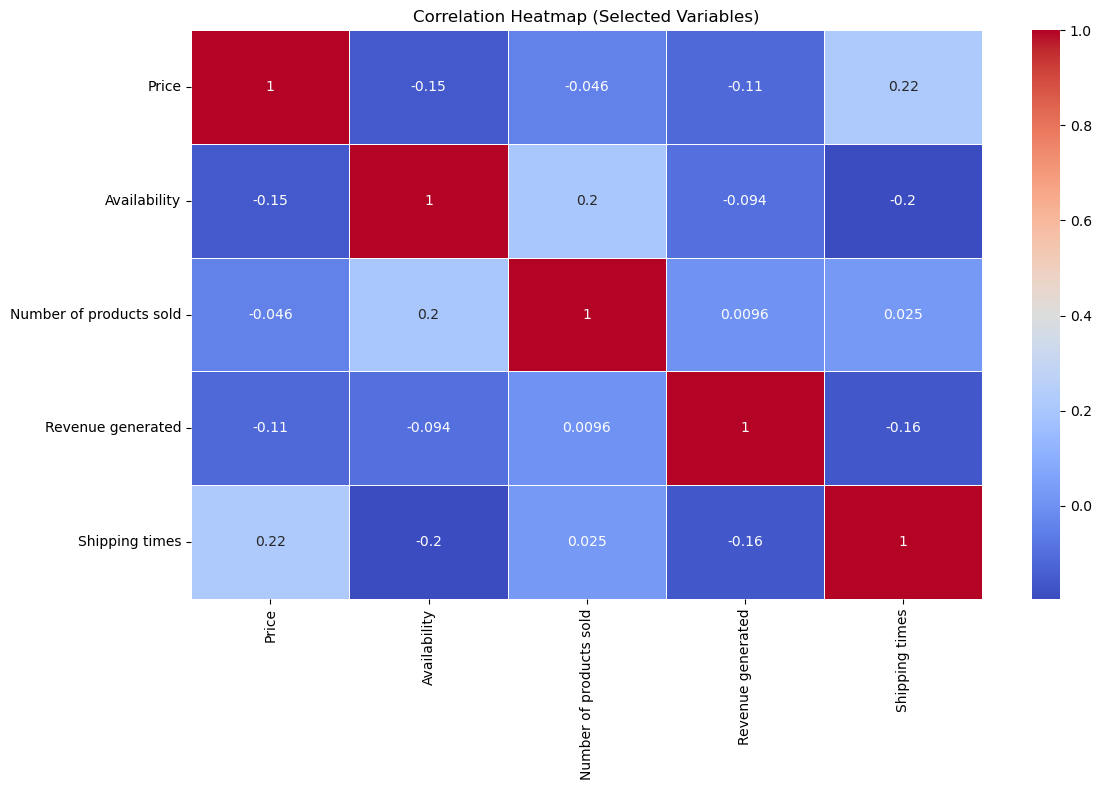

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'scaled_data' is your dataset, replace it with the actual variable holding your data
selected_columns = ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Shipping times']

# Select only the desired columns for the correlation matrix
numeric_columns = scaled_data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

# Set title and adjust layout
plt.title("Correlation Heatmap (Selected Variables)")
plt.tight_layout()

# Show the plot
plt.show()


In [29]:
to_keep_num = ['Price', 'Number of products sold','Order quantities', 'Shipping costs']
to_keep_cat = ['Product type','Shipping carriers','Location','Transportation modes','Inspection results','Shipping times']

analysis_data = raw_data[to_keep_num+to_keep_cat]
analysis_data.head()

,Price,Number of products sold,Order quantities,Shipping costs,Product type,Shipping carriers,Location,Transportation modes,Inspection results,Shipping times
0,69.808006,802,96,2.956572,haircare,Carrier B,Mumbai,Road,Pending,4
1,14.843523,736,37,9.716575,skincare,Carrier A,Mumbai,Road,Pending,2
2,11.319683,8,88,8.054479,haircare,Carrier B,Mumbai,Air,Pending,2
3,61.163343,83,59,1.729569,skincare,Carrier C,Kolkata,Rail,Fail,6
4,4.805496,871,56,3.890548,skincare,Carrier A,Delhi,Air,Fail,8


In [30]:
analysis_categorical_data = analysis_data.select_dtypes(exclude='number')

for col in analysis_categorical_data.columns:
    print ('Column Name: {}\t Unique entries:{}'.format(col, categorical_data[col].unique()))

Column Name: Product type	 Unique entries:['haircare' 'skincare' 'cosmetics']
Column Name: Shipping carriers	 Unique entries:['Carrier B' 'Carrier A' 'Carrier C']
Column Name: Location	 Unique entries:['Mumbai' 'Kolkata' 'Delhi' 'Bangalore' 'Chennai']
Column Name: Transportation modes	 Unique entries:['Road' 'Air' 'Rail' 'Sea']
Column Name: Inspection results	 Unique entries:['Pending' 'Fail' 'Pass']


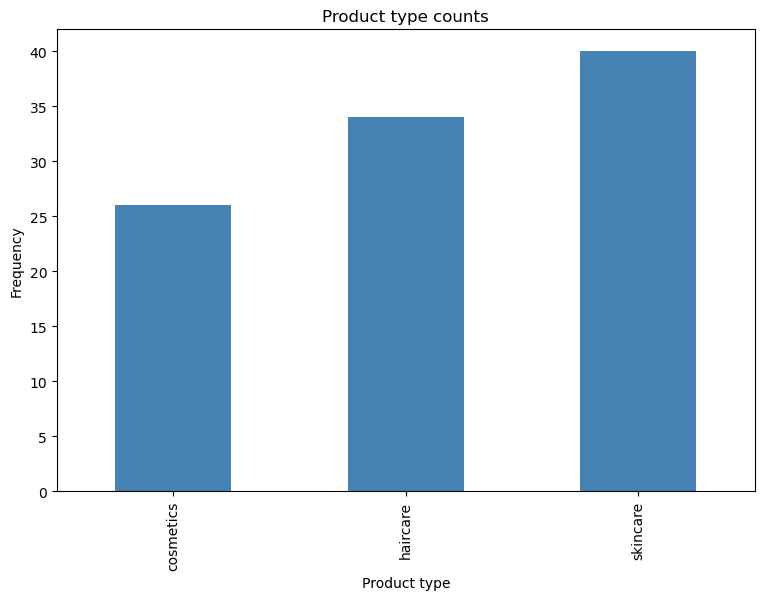

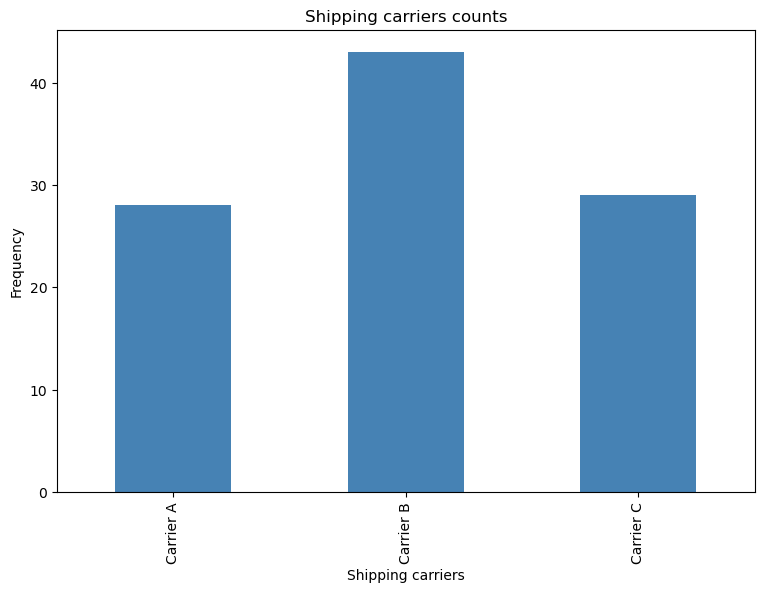

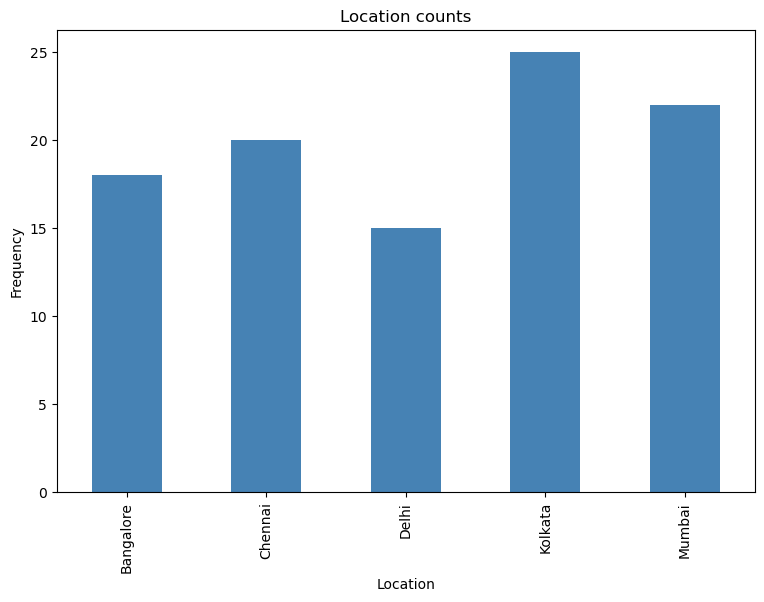

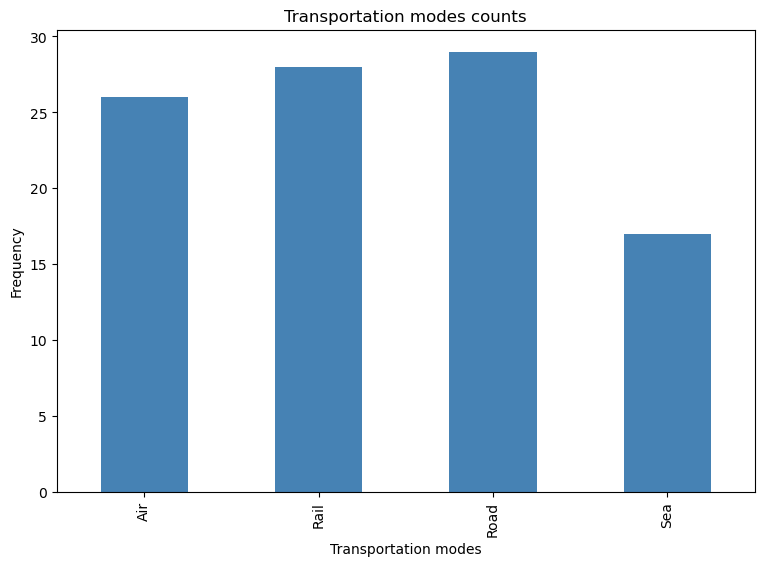

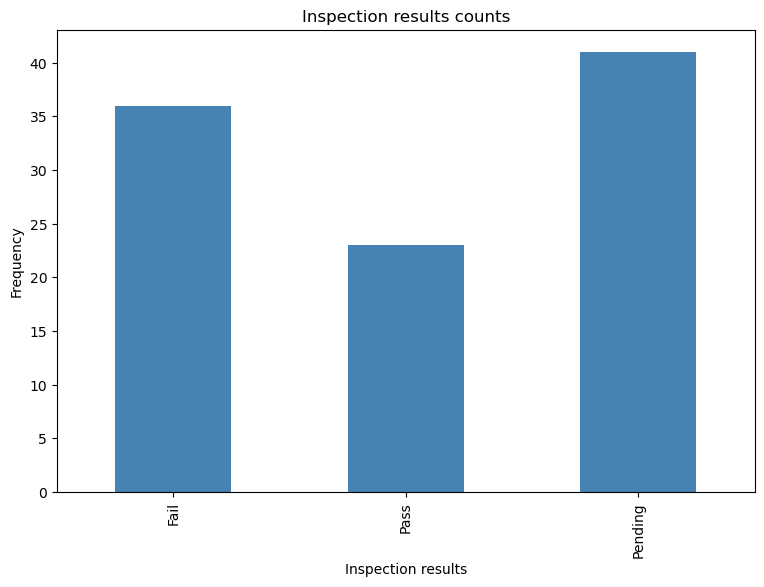

In [31]:
for col in analysis_categorical_data.columns:
    counts = analysis_categorical_data[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(30, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

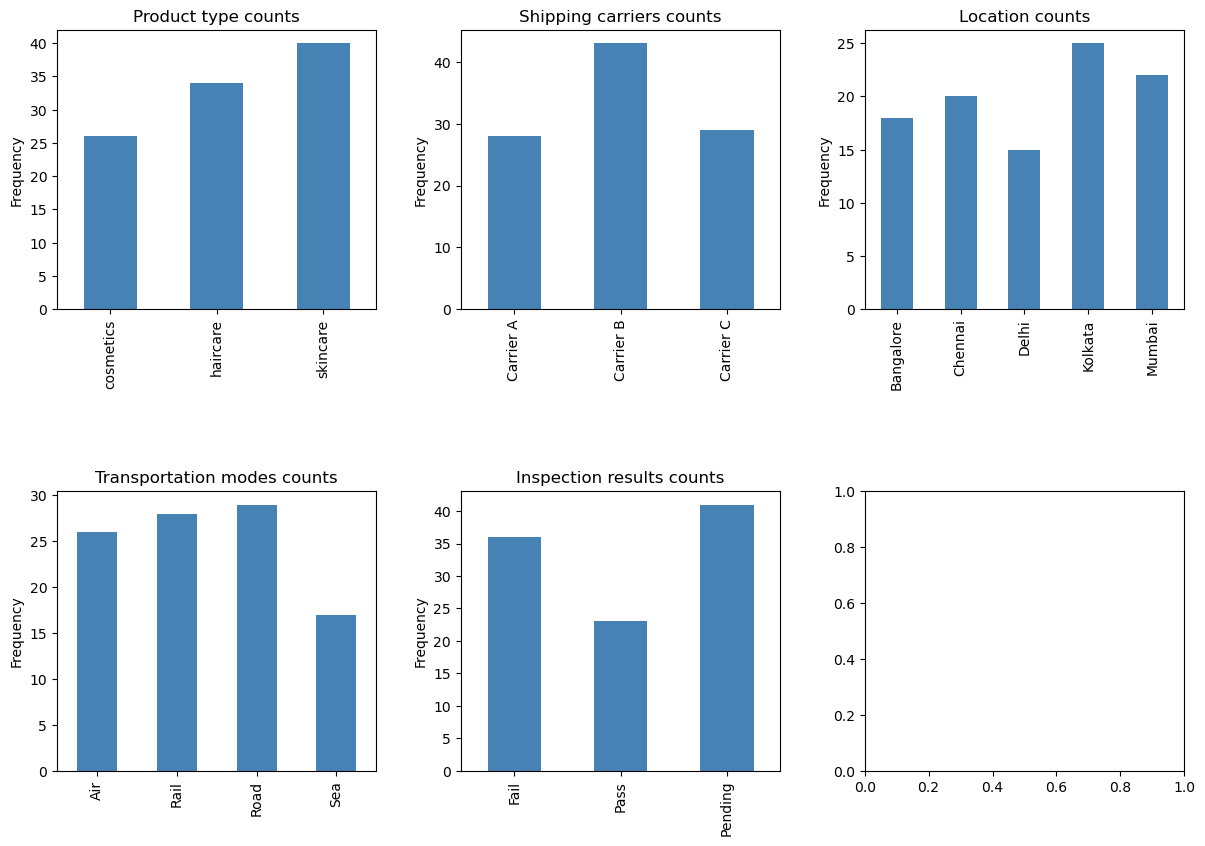

In [35]:
fig,axes = plt.subplots(2,3)

fig.set_figwidth(12)
fig.set_figheight(8)
fig.tight_layout(h_pad=11, w_pad = 3)

for colnum, col in enumerate(analysis_categorical_data.columns):
    counts = analysis_categorical_data[col].value_counts().sort_index()
    ax = axes[int(colnum/3)][colnum%3]  # Some clever maths to determine the layout of graphs
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
#     ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [38]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming my data is in a DataFrame called 'df'
# Replace this with your actual data loading code
df = pd.read_csv('travel.csv')

# Assuming 'Shipping times' is the target variable
X = df.drop('Shipping times', axis=1)
y = df['Shipping times']

# Combine oversampling and undersampling in a single step
sampler = RandomOverSampler(sampling_strategy={2: int(len(y) * 0.5)})  # Assuming 'Shipping times' has multi-class labels
X_resampled, y_resampled = sampler.fit_resample(X, y)

sampler = RandomUnderSampler(sampling_strategy='auto')  # Adjust the undersampling strategy as needed
X_balanced, y_balanced = sampler.fit_resample(X_resampled, y_resampled)

# Create a balanced DataFrame
balanced_data = pd.DataFrame(X_balanced, columns=X.columns)
balanced_data['Shipping times'] = y_balanced

balanced_data.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Shipping times
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312,1
57,haircare,SKU57,49.263205,65,227,1605.866900,Unknown,5,18,51,...,21,588,25,67.779623,Pending,2.511175,Rail,Route A,482.191239,1
79,haircare,SKU79,57.057031,56,198,7888.723268,Non-binary,31,25,20,...,5,228,12,57.870903,Pending,0.165872,Air,Route C,351.504219,1
82,skincare,SKU82,17.034931,13,336,2943.381868,Unknown,42,19,72,...,6,955,26,4.465278,Pending,4.137877,Road,Route C,589.978556,1
93,haircare,SKU93,69.290831,88,114,4531.402134,Unknown,63,17,66,...,21,824,20,35.633652,Fail,4.165782,Air,Route A,823.523846,1


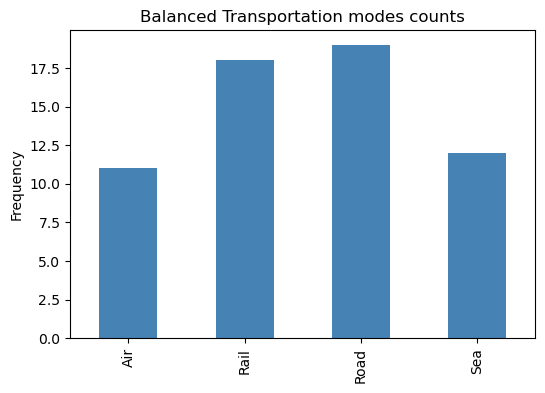

In [39]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()
counts = balanced_data['Transportation modes'].value_counts().sort_index()
counts.plot.bar(ax=ax, color='steelblue')
ax.set_title('Balanced Transportation modes counts')
ax.set_ylabel("Frequency")

plt.show()

In [43]:
from sklearn import preprocessing

# Assuming 'balanced_data' is your DataFrame with balanced data
lab_enc = preprocessing.LabelEncoder()
balanced_data['Transportation modes'] = lab_enc.fit_transform(balanced_data['Transportation modes'])
balanced_data.head()


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs,Shipping times
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,22,564,1,99.466109,Fail,0.398177,2,Route C,802.056312,1
57,haircare,SKU57,49.263205,65,227,1605.866900,Unknown,5,18,51,...,21,588,25,67.779623,Pending,2.511175,1,Route A,482.191239,1
79,haircare,SKU79,57.057031,56,198,7888.723268,Non-binary,31,25,20,...,5,228,12,57.870903,Pending,0.165872,0,Route C,351.504219,1
82,skincare,SKU82,17.034931,13,336,2943.381868,Unknown,42,19,72,...,6,955,26,4.465278,Pending,4.137877,2,Route C,589.978556,1
93,haircare,SKU93,69.290831,88,114,4531.402134,Unknown,63,17,66,...,21,824,20,35.633652,Fail,4.165782,0,Route A,823.523846,1


In [45]:
import pandas as pd
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
balanced_data['Transportation modes'] = lab_enc.fit_transform(balanced_data['Transportation modes'])

# Assuming 'one_hot_cols' is your list of columns to one-hot encode
one_hot_cols = ['Product type', 'SKU', 'Customer demographics', 'Routes']

# Create a copy of the DataFrame to avoid modifying the original data
balanced_data_encoded = balanced_data.copy()

# Iterate through columns and perform one-hot encoding
for col in one_hot_cols:
    # Ensure the column exists in the DataFrame
    if col in balanced_data_encoded.columns:
        # Perform one-hot encoding
        one_hot_encoded = pd.get_dummies(balanced_data_encoded[col], prefix=col)
        
        # Add the one-hot encoded columns to the DataFrame
        balanced_data_encoded = pd.concat([balanced_data_encoded, one_hot_encoded], axis=1)
        
        # Drop the original column as it's no longer needed
        balanced_data_encoded.drop(col, axis=1, inplace=True)

# Now 'balanced_data_encoded' contains both label encoded and one-hot encoded columns
# Print the first few rows of the DataFrame
balanced_data_encoded.head()


,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping carriers,Shipping costs,Supplier name,...,SKU_SKU92,SKU_SKU93,SKU_SKU97,Customer demographics_Female,Customer demographics_Male,Customer demographics_Non-binary,Customer demographics_Unknown,Routes_Route A,Routes_Route B,Routes_Route C
7,42.958384,59,426,8496.103813,93,17,11,Carrier B,2.348339,Supplier 4,...,0,0,0,1,0,0,0,0,0,1
57,49.263205,65,227,1605.866900,5,18,51,Carrier B,9.160559,Supplier 2,...,0,0,0,0,0,0,1,1,0,0
79,57.057031,56,198,7888.723268,31,25,20,Carrier B,6.496325,Supplier 3,...,0,0,0,0,0,1,0,0,0,1
82,17.034931,13,336,2943.381868,42,19,72,Carrier A,4.708182,Supplier 2,...,0,0,0,0,0,0,1,0,0,1
93,69.290831,88,114,4531.402134,63,17,66,Carrier C,7.006432,Supplier 4,...,0,1,0,0,0,0,1,1,0,0


In [49]:
# Print column names in balanced_data_encoded
print(balanced_data_encoded.columns)

# Verify column existence
for col in one_hot_cols:
    if col not in balanced_data_encoded.columns:
        print(f"Column '{col}' does not exist in balanced_data_encoded.")
    else:
        unique_entries = balanced_data_encoded[col].unique()
        print(f"Column Name: {col}\tUnique entries: {unique_entries}")


Index(['Price', 'Availability', 'Number of products sold', 'Revenue generated',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping carriers',
       'Shipping costs', 'Supplier name', 'Location', 'Lead time',
       'Production volumes', 'Manufacturing lead time', 'Manufacturing costs',
       'Inspection results', 'Defect rates', 'Transportation modes', 'Costs',
       'Shipping times', 'Product type_cosmetics', 'Product type_haircare',
       'Product type_skincare', 'SKU_SKU0', 'SKU_SKU1', 'SKU_SKU12',
       'SKU_SKU13', 'SKU_SKU15', 'SKU_SKU17', 'SKU_SKU18', 'SKU_SKU19',
       'SKU_SKU2', 'SKU_SKU22', 'SKU_SKU23', 'SKU_SKU26', 'SKU_SKU3',
       'SKU_SKU33', 'SKU_SKU35', 'SKU_SKU38', 'SKU_SKU39', 'SKU_SKU41',
       'SKU_SKU42', 'SKU_SKU44', 'SKU_SKU48', 'SKU_SKU49', 'SKU_SKU5',
       'SKU_SKU50', 'SKU_SKU51', 'SKU_SKU53', 'SKU_SKU54', 'SKU_SKU55',
       'SKU_SKU57', 'SKU_SKU58', 'SKU_SKU6', 'SKU_SKU60', 'SKU_SKU61',
       'SKU_SKU63', 'SKU_SKU64', 'SKU_SKU67',

In [50]:
encoded_data = pd.get_dummies(balanced_data_encoded,columns = one_hot_cols, prefix = one_hot_cols)
print(encoded_data.columns)
encoded_data.head(3)

Index(['Price', 'Availability', 'Number of products sold', 'Revenue generated',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping costs',
       'Location', 'Lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Inspection results',
       'Defect rates', 'Transportation modes', 'Costs', 'Shipping times',
       'Product type_cosmetics', 'Product type_haircare',
       'Product type_skincare', 'SKU_SKU0', 'SKU_SKU1', 'SKU_SKU12',
       'SKU_SKU13', 'SKU_SKU15', 'SKU_SKU17', 'SKU_SKU18', 'SKU_SKU19',
       'SKU_SKU2', 'SKU_SKU22', 'SKU_SKU23', 'SKU_SKU26', 'SKU_SKU3',
       'SKU_SKU33', 'SKU_SKU35', 'SKU_SKU38', 'SKU_SKU39', 'SKU_SKU41',
       'SKU_SKU42', 'SKU_SKU44', 'SKU_SKU48', 'SKU_SKU49', 'SKU_SKU5',
       'SKU_SKU50', 'SKU_SKU51', 'SKU_SKU53', 'SKU_SKU54', 'SKU_SKU55',
       'SKU_SKU57', 'SKU_SKU58', 'SKU_SKU6', 'SKU_SKU60', 'SKU_SKU61',
       'SKU_SKU63', 'SKU_SKU64', 'SKU_SKU67', 'SKU_SKU7', 'SKU_SKU71',
       'SKU_

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping costs,Location,Lead time,...,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
7,42.958384,59,426,8496.103813,93,17,11,2.348339,Bangalore,22,...,0,1,0,1,0,0,0,0,1,0
57,49.263205,65,227,1605.866900,5,18,51,9.160559,Delhi,21,...,0,0,0,1,0,0,1,0,0,0
79,57.057031,56,198,7888.723268,31,25,20,6.496325,Bangalore,5,...,0,1,0,1,0,0,0,1,0,0


In [51]:
# Drop unkown columns (missing data??)
for col in encoded_data:
    if ('unknown' in col) or ('nonexistent' in col):
        encoded_data.drop(col, axis='columns', inplace=True)
print(encoded_data.columns)
print(encoded_data.shape)
       

Index(['Price', 'Availability', 'Number of products sold', 'Revenue generated',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping costs',
       'Location', 'Lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Inspection results',
       'Defect rates', 'Transportation modes', 'Costs', 'Shipping times',
       'Product type_cosmetics', 'Product type_haircare',
       'Product type_skincare', 'SKU_SKU0', 'SKU_SKU1', 'SKU_SKU12',
       'SKU_SKU13', 'SKU_SKU15', 'SKU_SKU17', 'SKU_SKU18', 'SKU_SKU19',
       'SKU_SKU2', 'SKU_SKU22', 'SKU_SKU23', 'SKU_SKU26', 'SKU_SKU3',
       'SKU_SKU33', 'SKU_SKU35', 'SKU_SKU38', 'SKU_SKU39', 'SKU_SKU41',
       'SKU_SKU42', 'SKU_SKU44', 'SKU_SKU48', 'SKU_SKU49', 'SKU_SKU5',
       'SKU_SKU50', 'SKU_SKU51', 'SKU_SKU53', 'SKU_SKU54', 'SKU_SKU55',
       'SKU_SKU57', 'SKU_SKU58', 'SKU_SKU6', 'SKU_SKU60', 'SKU_SKU61',
       'SKU_SKU63', 'SKU_SKU64', 'SKU_SKU67', 'SKU_SKU7', 'SKU_SKU71',
       'SKU_

In [52]:
encoded_data = pd.get_dummies(balanced_data_encoded,columns = one_hot_cols, prefix = one_hot_cols)
print(encoded_data.columns)
encoded_data.head(3)

Index(['Price', 'Availability', 'Number of products sold', 'Revenue generated',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping costs',
       'Location', 'Lead time', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Inspection results',
       'Defect rates', 'Transportation modes', 'Costs', 'Shipping times',
       'Product type_cosmetics', 'Product type_haircare',
       'Product type_skincare', 'SKU_SKU0', 'SKU_SKU1', 'SKU_SKU12',
       'SKU_SKU13', 'SKU_SKU15', 'SKU_SKU17', 'SKU_SKU18', 'SKU_SKU19',
       'SKU_SKU2', 'SKU_SKU22', 'SKU_SKU23', 'SKU_SKU26', 'SKU_SKU3',
       'SKU_SKU33', 'SKU_SKU35', 'SKU_SKU38', 'SKU_SKU39', 'SKU_SKU41',
       'SKU_SKU42', 'SKU_SKU44', 'SKU_SKU48', 'SKU_SKU49', 'SKU_SKU5',
       'SKU_SKU50', 'SKU_SKU51', 'SKU_SKU53', 'SKU_SKU54', 'SKU_SKU55',
       'SKU_SKU57', 'SKU_SKU58', 'SKU_SKU6', 'SKU_SKU60', 'SKU_SKU61',
       'SKU_SKU63', 'SKU_SKU64', 'SKU_SKU67', 'SKU_SKU7', 'SKU_SKU71',
       'SKU_

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping costs,Location,Lead time,...,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
7,42.958384,59,426,8496.103813,93,17,11,2.348339,Bangalore,22,...,0,1,0,1,0,0,0,0,1,0
57,49.263205,65,227,1605.866900,5,18,51,9.160559,Delhi,21,...,0,0,0,1,0,0,1,0,0,0
79,57.057031,56,198,7888.723268,31,25,20,6.496325,Bangalore,5,...,0,1,0,1,0,0,0,1,0,0


In [59]:
encoded_data.drop('Inspection results', axis='columns', inplace=True)
encoded_data.head()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping costs,Lead time,Production volumes,...,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
7,42.958384,59,426,8496.103813,93,17,11,2.348339,22,564,...,0,1,0,1,0,0,0,0,1,0
57,49.263205,65,227,1605.866900,5,18,51,9.160559,21,588,...,0,0,0,1,0,0,1,0,0,0
79,57.057031,56,198,7888.723268,31,25,20,6.496325,5,228,...,0,1,0,1,0,0,0,1,0,0
82,17.034931,13,336,2943.381868,42,19,72,4.708182,6,955,...,0,1,1,0,0,0,1,0,0,0
93,69.290831,88,114,4531.402134,63,17,66,7.006432,21,824,...,0,0,0,0,1,0,0,0,1,0


In [60]:
scaler = preprocessing.MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(encoded_data), columns = encoded_data.columns)
scaled_data.head()
scaled_data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping costs,Lead time,Production volumes,...,Routes_Route B,Routes_Route C,Shipping carriers_Carrier A,Shipping carriers_Carrier B,Shipping carriers_Carrier C,Supplier name_Supplier 1,Supplier name_Supplier 2,Supplier name_Supplier 3,Supplier name_Supplier 4,Supplier name_Supplier 5
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.466826,0.482281,0.444439,0.503925,0.490909,0.559770,0.535789,0.542545,0.532184,0.486285,...,0.416667,0.200000,0.383333,0.333333,0.283333,0.200000,0.200000,0.216667,0.216667,0.166667
std,0.315755,0.324845,0.302929,0.319477,0.304068,0.310596,0.285701,0.298135,0.306218,0.295701,...,0.497167,0.403376,0.490301,0.475383,0.454420,0.403376,0.403376,0.415450,0.415450,0.375823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145064,0.189474,0.173507,0.179457,0.275253,0.301724,0.363158,0.345442,0.267241,0.236095,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.497812,0.500000,0.382729,0.507821,0.474747,0.586207,0.563158,0.506930,0.586207,0.482406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.738331,0.802632,0.687633,0.776204,0.727273,0.827586,0.747368,0.771973,0.793103,0.723893,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Assuming scaled_data contains your features and the target variable 'Shipping costs'

# Separate features (X) and target variable (y)
x = scaled_data.drop('Shipping costs', axis='columns')
y = scaled_data['Routes_Route C']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Standardize the features (optional but often recommended for SVM)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train the Support Vector Regressor (SVR)
svr = SVR(kernel='sigmoid')  # You can choose the kernel based on your requirements
svr.fit(x_train_scaled, y_train)

# Evaluate the model
score = svr.score(x_test_scaled, y_test)
print("R^2 Score:", score)


R^2 Score: 0.7564032081252929


LINEAR REGRESSION MODEL

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [140]:
# Assuming your dataset is in a variable called 'scaled_data'
# Update the following line based on your dataset structure
x = scaled_data.drop('Shipping costs', axis='columns')
y = scaled_data['Shipping costs']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [141]:
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)


R^2 Score: -1.3095344751368256
Mean Squared Error: 0.16122276285122203


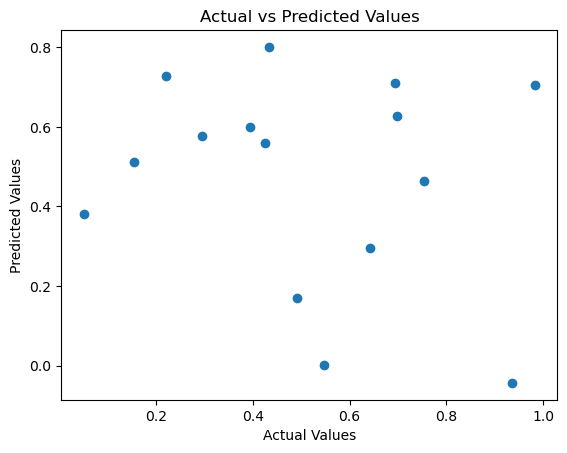

In [139]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()
